# --------------------------------------------------------------------------------------------
# <center> Wine Drink Model </center>
# --------------------------------------------------------------------------------------------

## Import Lib & Model 

In [29]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
# import modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

## Load dataset & Basic checks

In [31]:
# load the dataset
df = pd.read_csv('Wine dataset.csv')
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [33]:

print("Dataset shape:", df.shape)
print("\nClass distribution:\n", df['class'].value_counts())

# Fix column name (trailing space)
df.columns = df.columns.str.strip()
X = df.drop('class', axis=1)  # Features only
y = df['class'] - 1  # Target variable adjusted to start from 0

Dataset shape: (178, 14)

Class distribution:
 class
2    71
1    59
3    48
Name: count, dtype: int64


## EDA Visualiztions

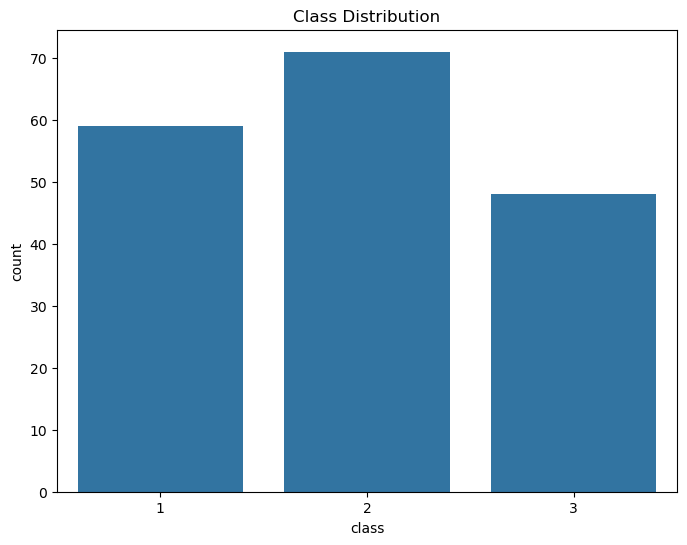

In [34]:
# 1. Class distribution bar
plt.figure(figsize=(8,6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

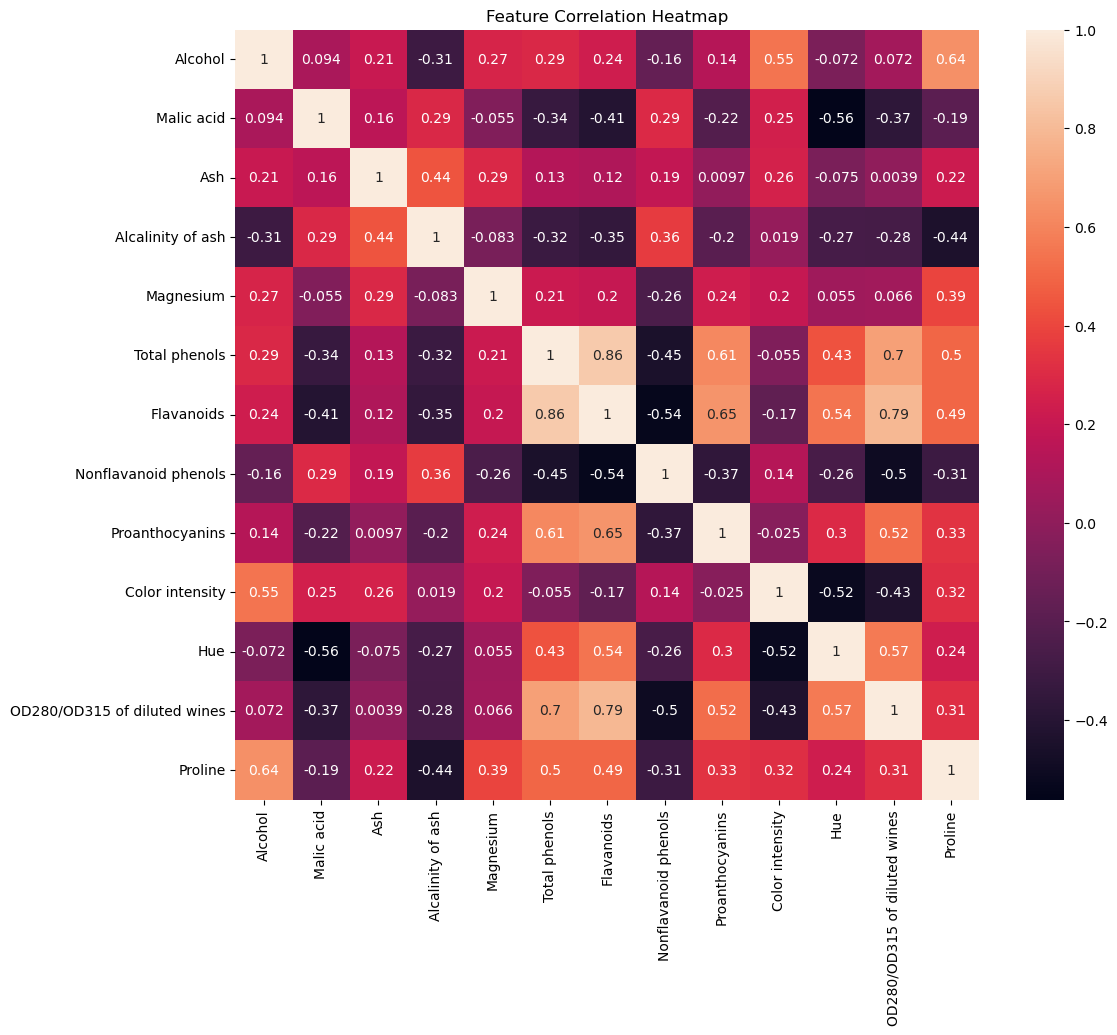

In [35]:
# 2. Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

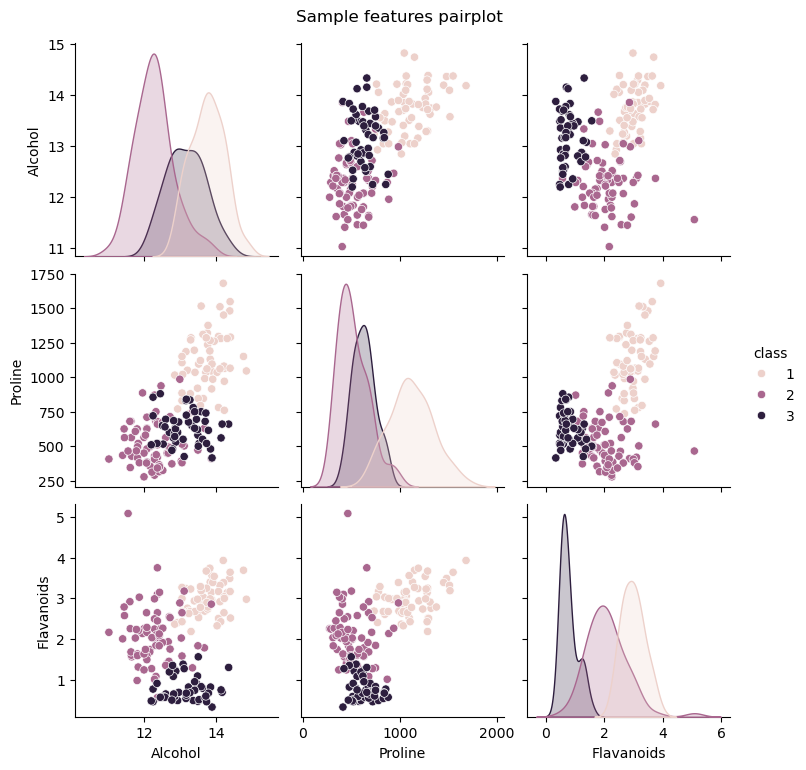

In [36]:
# 3. Pairplot
sns.pairplot(df[['Alcohol','Proline','Flavanoids','class']], hue='class')
plt.suptitle('Sample features pairplot', y=1.02)
plt.show()

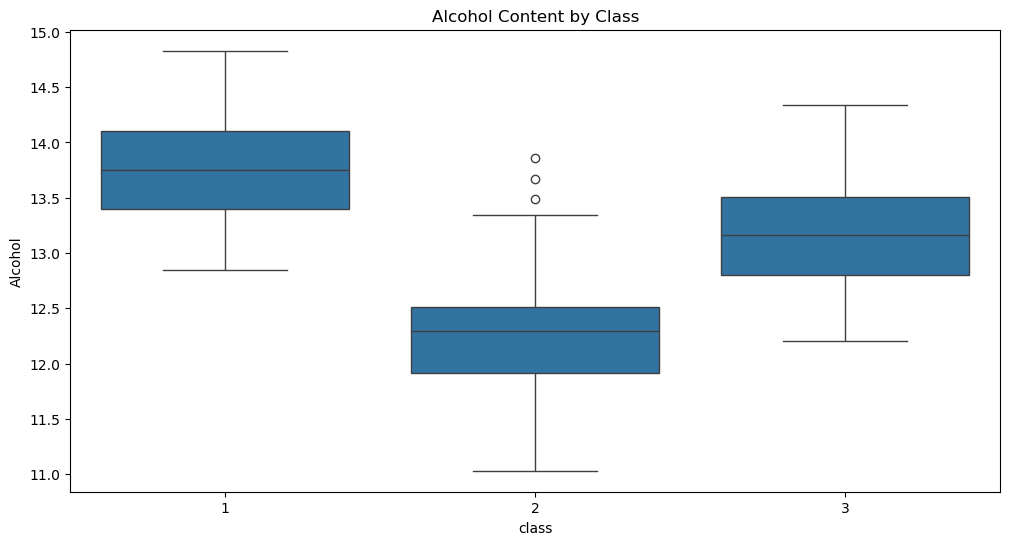

In [37]:
# 4. Boxplots for selected features
plt.figure(figsize=(12,6))
sns.boxplot(x='class', y='Alcohol', data=df)
plt.title('Alcohol Content by Class')
plt.show()

## Training & Testing

In [38]:
x = df.drop('class', axis=1)
y = df['class']-1

In [39]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y) 
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)  

In [40]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True,random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
      })

In [41]:
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL RESULTS TABLE")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

results_df['Accuracy'] = results_df['Accuracy'].astype(float)
results_df_sorted = results_df.sort_values('Accuracy', ascending=False)
print("\nMODEL RANKING (by Accuracy):")
print(results_df_sorted[['Model', 'Accuracy']].to_string(index=False))


MODEL RESULTS TABLE
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.972222   0.974074 0.972222  0.971970
                SVM  0.972222   0.974074 0.972222  0.971970
                KNN  0.972222   0.974747 0.972222  0.972369
      Decision Tree  0.944444   0.951389 0.944444  0.944961
      Random Forest  1.000000   1.000000 1.000000  1.000000
  Gradient Boosting  0.944444   0.946581 0.944444  0.944269

MODEL RANKING (by Accuracy):
              Model  Accuracy
      Random Forest  1.000000
Logistic Regression  0.972222
                SVM  0.972222
                KNN  0.972222
      Decision Tree  0.944444
  Gradient Boosting  0.944444
